<a href="https://colab.research.google.com/github/FranciscoMedellin/nav-autonoma-equipo-9/blob/main/SVM_Peatones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
from skimage.feature import hog

In [ ]:
!ls /content/drive/MyDrive/data_svm_pp/
!ls /content/drive/MyDrive/data_svm_pp/people/
!ls /content/drive/MyDrive/data_svm_pp/no_people/


no_people  people
0.png	 146.png  192.png  238.png  284.png  32.png   376.png  421.png	468.png  513.png  56.png
100.png  147.png  193.png  239.png  285.png  330.png  377.png  422.png	469.png  514.png  57.png
101.png  148.png  194.png  23.png   286.png  331.png  378.png  423.png	46.png	 515.png  58.png
102.png  149.png  195.png  240.png  287.png  332.png  379.png  424.png	470.png  516.png  59.png
103.png  14.png   196.png  241.png  288.png  333.png  37.png   425.png	471.png  517.png  5.png
104.png  150.png  197.png  242.png  289.png  334.png  380.png  426.png	472.png  518.png  60.png
105.png  151.png  198.png  243.png  28.png   335.png  381.png  427.png	473.png  519.png  61.png
106.png  152.png  199.png  244.png  290.png  336.png  382.png  428.png	474.png  51.png   62.png
107.png  153.png  19.png   245.png  291.png  337.png  383.png  429.png	475.png  520.png  63.png
108.png  154.png  1.png    246.png  292.png  338.png  384.png  42.png	476.png  521.png  64.png
109.png  155.png  200.png  

In [ ]:
import glob

people = glob.glob("/content/drive/MyDrive/data_svm_pp/people/**/*.png", recursive=True)
no_people = glob.glob("/content/drive/MyDrive/data_svm_pp/no_people/**/*.png", recursive=True)

print("Number of people images:", len(people))
print("Number of non-people images:", len(no_people))

Number of people images: 559
Number of non-people images: 362


In [ ]:
len(people)

559

In [ ]:
len(no_people)

362

Se muesta imagen aleatoriamente de una persona

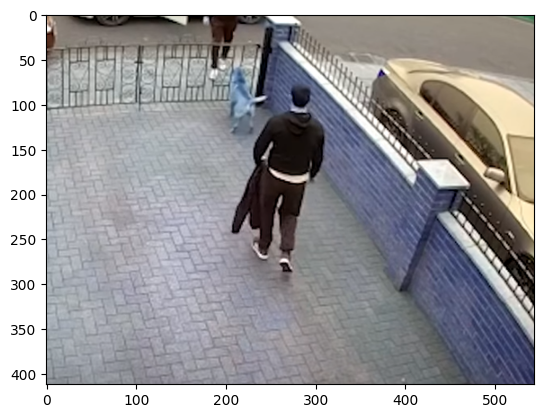

In [ ]:
img_color = cv2.imread(people[10])
plt.imshow(img_color)

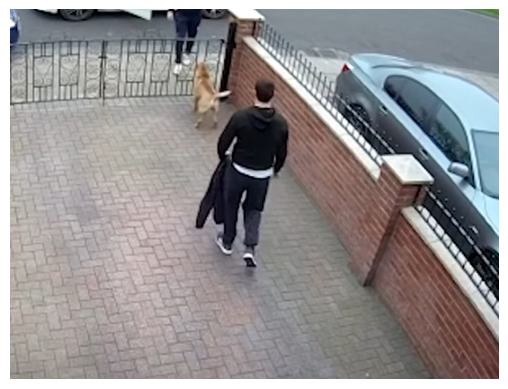

In [ ]:
# Leer la imagen en formato BGR
img_color = cv2.imread(people[10])

# Convertir la imagen de BGR a RGB
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

# Mostrar la imagen en formato RGB
plt.imshow(img_rgb)
plt.axis('off')  # Opcional, para ocultar los ejes
plt.show()

Se calcula el HOG histograma de gradientes orientados de la imagen


*   Elemento de la lista
*   Elemento de la lista



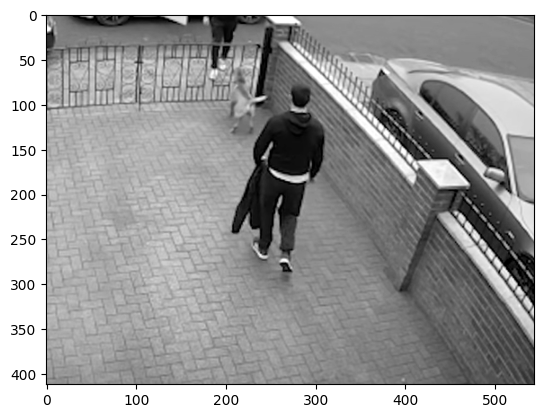

In [ ]:
img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap="gray")

In [ ]:
features,hog_img = hog(img_gray,
                       orientations = 11,
                       pixels_per_cell = (16,16),
                       cells_per_block = (2,2),
                       transform_sqrt = False,
                       visualize = True,
                       feature_vector = True)

In [ ]:
features.shape

(34848,)

In [ ]:
hog_img.shape

(412, 544)

esto es lo que encuentra el algoritmo

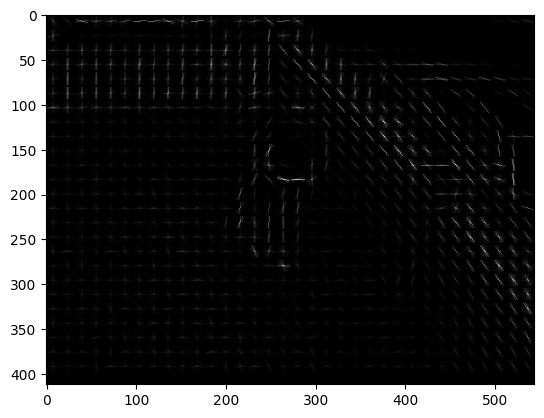

In [ ]:
plt.imshow(hog_img,cmap = 'gray')

In [ ]:
# Definir un tamaño fijo para las imágenes
fixed_size = (128, 128)

people_hog_accum = []

for i in people:
    try:
        # Usar cv2.imread en lugar de mpimg.imread
        img_color = cv2.imread(i)
        if img_color is None:
            print(f"Error al leer el archivo {i}.")
            continue

        # Redimensionar la imagen al tamaño fijo
        img_resized = cv2.resize(img_color, fixed_size)

        img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

        people_hog_feature, people_hog_img = hog(img_gray,
                                                 orientations=11,
                                                 pixels_per_cell=(16, 16),
                                                 cells_per_block=(2, 2),
                                                 transform_sqrt=False,
                                                 visualize=True,
                                                 feature_vector=True)

        people_hog_accum.append(people_hog_feature)
    except Exception as e:
        print(f"Error procesando el archivo {i}: {e}")

# Convertir la lista de características HOG en una matriz numpy
X_people = np.vstack(people_hog_accum).astype(np.float64)

# Crear las etiquetas correspondientes
y_people = np.ones(len(X_people))

# Verificar los resultados
print(f"Shape of X_people: {X_people.shape}")
print(f"Shape of y_people: {y_people.shape}")

Shape of X_people: (559, 2156)
Shape of y_people: (559,)


In [ ]:
X_people = np.vstack(people_hog_accum).astype(np.float64)
y_people = np.ones(len(X_people))

In [ ]:
# Definir un tamaño fijo para las imágenes
fixed_size = (128, 128)

nopeople_hog_accum = []

for i in no_people:
    try:
        # Usar cv2.imread en lugar de mpimg.imread
        img_color = cv2.imread(i)
        if img_color is None:
            print(f"Error al leer el archivo {i}.")
            continue

        # Redimensionar la imagen al tamaño fijo
        img_resized = cv2.resize(img_color, fixed_size)

        img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

        nopeople_hog_feature, nopeople_hog_img = hog(img_gray,
                                                 orientations=11,
                                                 pixels_per_cell=(16, 16),
                                                 cells_per_block=(2, 2),
                                                 transform_sqrt=False,
                                                 visualize=True,
                                                 feature_vector=True)

        nopeople_hog_accum.append(nopeople_hog_feature)
    except Exception as e:
        print(f"Error procesando el archivo {i}: {e}")

# Convertir la lista de características HOG en una matriz numpy
X_nopeople = np.vstack(nopeople_hog_accum).astype(np.float64)

# Crear las etiquetas correspondientes
y_nopeople = np.zeros(len(X_nopeople))

# Verificar los resultados
print(f"Shape of X_people: {X_nopeople.shape}")
print(f"Shape of y_people: {y_nopeople.shape}")

Shape of X_people: (362, 2156)
Shape of y_people: (362,)


In [ ]:
X_nopeople = np.vstack(nopeople_hog_accum).astype(np.float64)
y_nopeople = np.zeros(len(X_nopeople))

Se combinan ambos tipos de datos para alimentar el SVM

In [ ]:
X = np.vstack((X_people,X_nopeople))
X.shape

(921, 2156)

In [ ]:
y = np.hstack((y_people,y_nopeople))
y.shape

(921,)

Se generan los datos de entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape

(736, 2156)

In [ ]:
X_test.shape

(185, 2156)

Se importa el Clasificador y se entrena

In [ ]:
#from sklearn.svm import LinearSVC

#svc_model = LinearSVC()
#svc_model.fit(X_train, y_train)
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [ ]:
y_predict = svc_model.predict(X_test)

<Axes: >

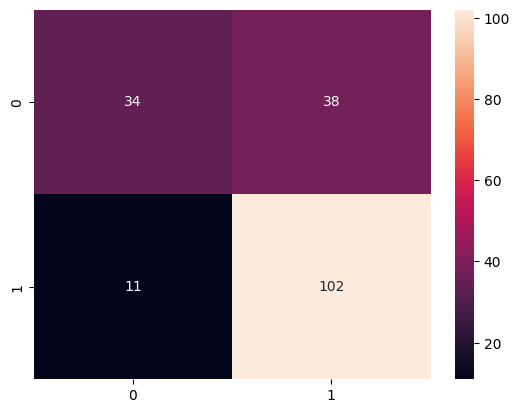

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt = "d")

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.76      0.47      0.58        72
         1.0       0.73      0.90      0.81       113

    accuracy                           0.74       185
   macro avg       0.74      0.69      0.69       185
weighted avg       0.74      0.74      0.72       185



Podemos mejorar el 0.74 de accuracy

GridSearchCV Se aprovehca apra echar un vistazo a Grid Search cross validation, loq ue se pretende es averiguar de los dos argumentos en el kernel C y gamma.

hay 3 tipos de kernel en SVM: lineal, poli (cuadraticas), rbf soporta parametro c y gamma

In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   0.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.605 total time=   0.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.605 total time=   0.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.605 total time=   0.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.605 total time=   0.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.608 total time=   0.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.605 total time=   0.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.605 total time=   0.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.605 total time=   0.5s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.605 total time=   0.6s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.608 total time=   0.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=4)

In [ ]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_

SVC(C=10, gamma=0.1)

In [ ]:
grid_predictions = grid.predict(X_test)

<Axes: >

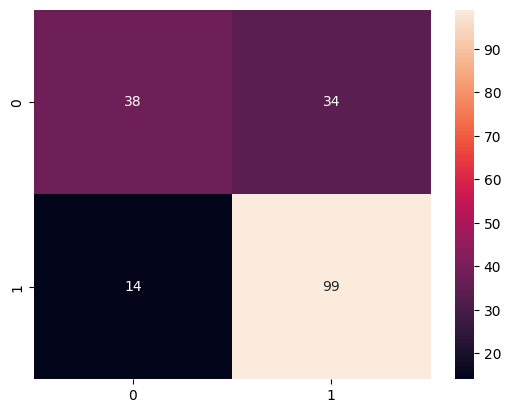

In [ ]:
cm = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cm, annot=True, fmt = "d")

In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       0.73      0.53      0.61        72
         1.0       0.74      0.88      0.80       113

    accuracy                           0.74       185
   macro avg       0.74      0.70      0.71       185
weighted avg       0.74      0.74      0.73       185

